In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [ ]:
data = pd.read_csv('../autodl-tmp/mbti_1.csv')

type_counts = data['type'].value_counts(normalize=True).sort_index() * 100

palette = sns.color_palette("hsv", len(type_counts))

plt.figure(figsize=(12, 9))
sns.barplot(x=type_counts.index, y=type_counts.values, palette=palette)

plt.ylabel('Percentage (%)')
plt.xlabel('MBTI Type')

plt.title('MBTI Type Distribution')

plt.show()

/tmp/ipykernel_927/4036883908.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=type_counts.index, y=type_counts.values, palette=palette)


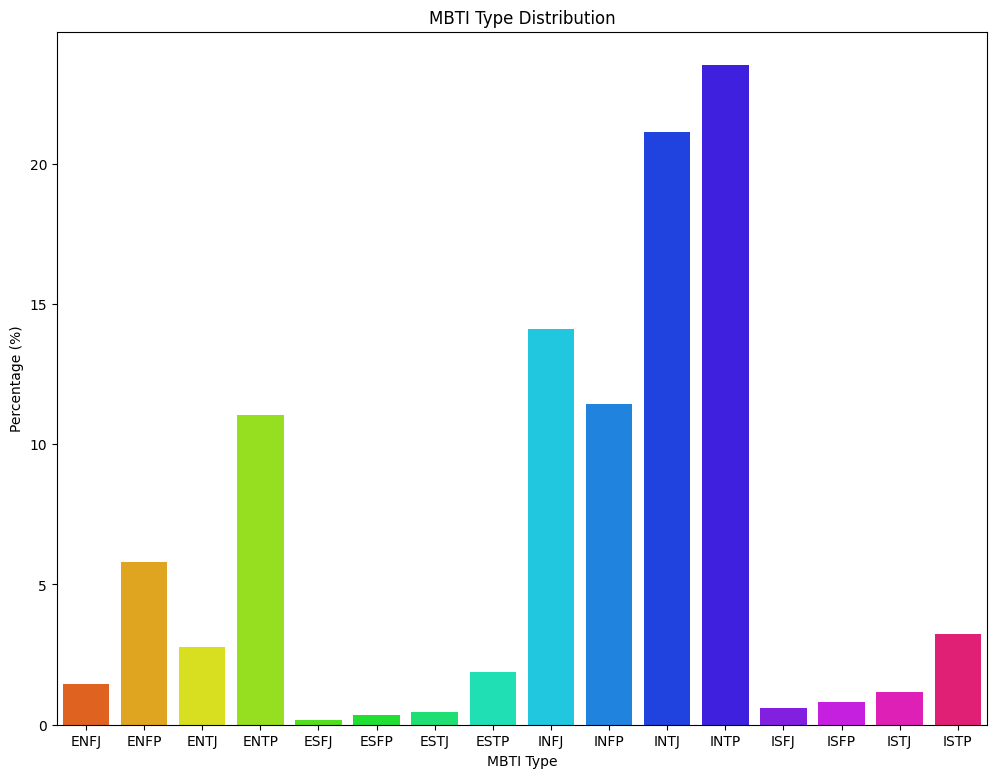

In [4]:
data = pd.read_csv('../autodl-tmp/MBTI 500.csv')

type_counts = data['type'].value_counts(normalize=True).sort_index() * 100

palette = sns.color_palette("hsv", len(type_counts))

plt.figure(figsize=(12, 9))
sns.barplot(x=type_counts.index, y=type_counts.values, palette=palette)

plt.ylabel('Percentage (%)')
plt.xlabel('MBTI Type')

plt.title('MBTI Type Distribution')

plt.show()

In [6]:
import pandas as pd

from collections import defaultdict
import re

# Function to clean and tokenize text
def tokenize(text):
    # Remove URLs and non-alphanumeric characters
    text = re.sub(r'http\S+|[^a-zA-Z0-9\s]', '', text)
    # Convert to lowercase and split into words
    return text.lower().split()

# Dictionary to store the count of rows in which each word appears
word_count = defaultdict(int)

# Process each row in the dataset
for post in data['posts']:
    # Tokenize the post
    words = set(tokenize(post))  # Using set to ensure each word is counted once per row
    # Update word counts
    for word in words:
        word_count[word] += 1

# Filter out words that appear in less than 69 rows
filtered_words = {word: count for word, count in word_count.items() if count >= 69}

# Display some of the filtered words as a sample
list(filtered_words.items())[:10]


# Function to filter words in a text based on the filtered words set, while keeping "|||"
def filter_text_preserve_delimiter(text, filtered_words_set):
    # Split the text by "|||" to preserve it in the final text
    posts = text.split('|||')
    # Filter each post
    filtered_posts = [' '.join([word for word in tokenize(post) if word in filtered_words_set]) for post in posts]
    # Join the filtered posts with "|||"
    return '|||'.join(filtered_posts)

# Apply the filter to each row in the 'posts' column while preserving "|||"
data['filtered_posts'] = data['posts'].apply(lambda x: filter_text_preserve_delimiter(x, set(filtered_words)))

# Display the first few rows of the updated dataset to show the filtered posts with "|||" preserved
data.head()

,posts,type,filtered_posts
0,know intj tool use interaction people excuse a...,INTJ,know intj tool use interaction people excuse a...
1,rap music ehh opp yeah know valid well know fa...,INTJ,rap music ehh yeah know valid well know fact p...
2,preferably p hd low except wew lad video p min...,INTJ,preferably p hd low except lad video p mind go...
3,drink like wish could drink red wine give head...,INTJ,drink like wish could drink red wine give head...
4,space program ah bad deal meing freelance max ...,INTJ,space program ah bad deal meing freelance max ...


In [7]:
# Replace all occurrences of "|||" with an empty string in the 'filtered_posts' column
data['filtered_posts'] = data['filtered_posts'].str.replace('|||', '', regex=False)

# Display the first few rows of the updated dataset to show the filtered posts without "|||"
data.head()

,posts,type,filtered_posts
0,know intj tool use interaction people excuse a...,INTJ,know intj tool use interaction people excuse a...
1,rap music ehh opp yeah know valid well know fa...,INTJ,rap music ehh yeah know valid well know fact p...
2,preferably p hd low except wew lad video p min...,INTJ,preferably p hd low except lad video p mind go...
3,drink like wish could drink red wine give head...,INTJ,drink like wish could drink red wine give head...
4,space program ah bad deal meing freelance max ...,INTJ,space program ah bad deal meing freelance max ...


In [8]:
expanded_data = data
print(expanded_data.head(30))

                                                posts  type  \
0   know intj tool use interaction people excuse a...  INTJ   
1   rap music ehh opp yeah know valid well know fa...  INTJ   
2   preferably p hd low except wew lad video p min...  INTJ   
3   drink like wish could drink red wine give head...  INTJ   
4   space program ah bad deal meing freelance max ...  INTJ   
5   loose stop overthinking everything ruin friend...  INTJ   
6   often men one put chance get burn otherwise no...  INTJ   
7   early definitely relate quiet self destruction...  INTJ   
8   one full list would impossibly long quotable f...  INTJ   
9   technique information power share unless absol...  INTJ   
10  sure ego check except immature intjs painfully...  INTJ   
11  personally think right avenue meet someone int...  INTJ   
12  know beginner intermediate player want chess b...  INTJ   
13  community plus pedophile thank lead follow get...  INTJ   
14  waste time like nut bos level stuff well happi...  

In [9]:
# Remove rows where 'filtered_posts' column is empty
data_filtered = expanded_data[expanded_data['filtered_posts'] != '']

# Display the first few rows of the updated dataset
data_filtered.head()

,posts,type,filtered_posts
0,know intj tool use interaction people excuse a...,INTJ,know intj tool use interaction people excuse a...
1,rap music ehh opp yeah know valid well know fa...,INTJ,rap music ehh yeah know valid well know fact p...
2,preferably p hd low except wew lad video p min...,INTJ,preferably p hd low except lad video p mind go...
3,drink like wish could drink red wine give head...,INTJ,drink like wish could drink red wine give head...
4,space program ah bad deal meing freelance max ...,INTJ,space program ah bad deal meing freelance max ...


In [10]:
import os
import nltk

In [11]:

LOCAL_NLTK = os.path.join(os.getcwd(), "nltk_data")
os.makedirs(LOCAL_NLTK, exist_ok=True)

nltk.data.path.append(LOCAL_NLTK)

In [9]:
nltk.download('stopwords', download_dir=LOCAL_NLTK, quiet=True)

True

In [30]:
nltk.download('wordnet', download_dir=LOCAL_NLTK, quiet=True)

True

In [12]:
import pandas as pd
import re
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import nltk



lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))
print(stop_words)

def clean_and_preprocess(text):

    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'[^\w\s]', '', text)

    words = text.split()
    cleaned_text = []
    for word in words:
        if word.lower() not in stop_words:
            lemmatized_word = lemmatizer.lemmatize(word.lower())
            cleaned_text.append(lemmatized_word)

    return ' '.join(cleaned_text)

expanded_data['filtered_posts'] = expanded_data['filtered_posts'].apply(clean_and_preprocess)

expanded_data = expanded_data[expanded_data['filtered_posts'].str.strip() != '']

expanded_data.head()

{'them', 'both', "we're", 'their', 'by', 'my', 'because', 'don', 'mightn', 'who', "it'll", 'now', 'wasn', 'all', 'under', 'nor', 'has', 'hasn', 'for', 'aren', 'as', 'down', "she'll", "it's", 'and', 'why', 'shouldn', "wasn't", 'me', 'such', "you'd", 'i', 'themselves', 'if', 'a', 'after', 'be', "he'll", 'we', 'is', 'during', "they're", 'what', "i'm", 'was', 'wouldn', 'at', 're', 'isn', 'its', "they've", "he's", 'were', 'it', 'you', 'about', 'ourselves', 'hadn', 'am', 'theirs', 'haven', "doesn't", 'y', 'been', 'when', 'had', 'won', 'over', 'through', "shouldn't", 'with', "weren't", 'couldn', "that'll", 'd', 'being', 'll', 'didn', 'have', "they'd", 'how', 'the', 'do', "mightn't", 'did', 'out', 'ain', 'where', "he'd", 'not', 'myself', 'should', 'doesn', 'whom', 'above', 't', "didn't", 'just', 'any', 'into', 'to', "i'll", 'on', 'he', 'herself', "she'd", "you'll", 'yourself', 'o', 'those', 'needn', 'other', 'that', "we'll", 'they', "we'd", "isn't", 'she', 'can', "haven't", 'until', 'there', "

,posts,type,filtered_posts
0,know intj tool use interaction people excuse a...,INTJ,know intj tool use interaction people excuse a...
1,rap music ehh opp yeah know valid well know fa...,INTJ,rap music ehh yeah know valid well know fact p...
2,preferably p hd low except wew lad video p min...,INTJ,preferably p hd low except lad video p mind go...
3,drink like wish could drink red wine give head...,INTJ,drink like wish could drink red wine give head...
4,space program ah bad deal meing freelance max ...,INTJ,space program ah bad deal meing freelance max ...


In [13]:
print(expanded_data)

                                                    posts  type  \
0       know intj tool use interaction people excuse a...  INTJ   
1       rap music ehh opp yeah know valid well know fa...  INTJ   
2       preferably p hd low except wew lad video p min...  INTJ   
3       drink like wish could drink red wine give head...  INTJ   
4       space program ah bad deal meing freelance max ...  INTJ   
...                                                   ...   ...   
106062  stay frustrate world life want take long nap w...  INFP   
106063  fizzle around time mention sure mistake thing ...  INFP   
106064  schedule modify hey w intp strong wing underst...  INFP   
106065  enfj since january busy schedule able spend li...  INFP   
106066  feel like men good problem tell parent want te...  INFP   

                                           filtered_posts  
0       know intj tool use interaction people excuse a...  
1       rap music ehh yeah know valid well know fact p...  
2       prefera

In [ ]:
from sklearn.preprocessing import LabelEncoder

data = pd.read_csv('../autodl-tmp/mbti_1.csv')


label_encoder = LabelEncoder()
expanded_data['encoded_labels'] = label_encoder.fit_transform(expanded_data['type']) 


X = expanded_data['filtered_posts']
y = expanded_data['encoded_labels']

In [14]:
from sklearn.preprocessing import LabelEncoder

data = pd.read_csv('../autodl-tmp/MBTI 500.csv')


label_encoder = LabelEncoder()
expanded_data['encoded_labels'] = label_encoder.fit_transform(expanded_data['type']) 


X = expanded_data['filtered_posts']
y = expanded_data['encoded_labels']

In [15]:
from sklearn.utils import resample

class_counts = expanded_data['encoded_labels'].value_counts()

max_class_count = class_counts.max()

data_upsampled = pd.DataFrame()
for class_index, count in class_counts.items():
    data_class = expanded_data[expanded_data['encoded_labels'] == class_index]
    data_class_upsampled = resample(data_class, 
                                    replace=True, 
                                    n_samples=max_class_count, 
                                    random_state=123)
    data_upsampled = pd.concat([data_upsampled, data_class_upsampled])

data_upsampled = data_upsampled.sample(frac=1).reset_index(drop=True)

In [16]:
import torch
from torch.utils.data import DataLoader, RandomSampler, TensorDataset
from transformers import BertTokenizer, BertForSequenceClassification, AdamW
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
import pandas as pd
import numpy as np

2025-04-20 20:19:47.640792: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-04-20 20:19:48.266065: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/root/miniconda3/lib/python3.8/site-packages/torchvision/datapoints/__init__.py:12: UserWarning: The torchvision.datapoints and torchvision.transforms.v2 namespaces are still Beta. While we do not expect major breaking changes, some APIs may still change according to user feedback. Please submit any feedback you may have in this issue: https://github.com/pytorch/vision/issues/6753, and you can also check out https://github.com/pytorch/vision/issues/7319 to learn more about the APIs that we suspect might involve future changes. You can silence this warning by

In [ ]:
from concurrent.futures import ProcessPoolExecutor
from transformers import BertTokenizer
import torch
from tqdm.notebook import tqdm


def encode_text(sent, tokenizer, max_len):
    encoded = tokenizer.encode_plus(
        sent,
        add_special_tokens=True,
        max_length=max_len,
        padding='max_length',
        return_attention_mask=True,
        truncation=True
    )
    return encoded['input_ids'], encoded['attention_mask']


def bert_encode(data, max_len):
    model_dir = "../autodl-tmp/uncased_L-12_H-768_A-12"
    tokenizer = BertTokenizer.from_pretrained(
    model_dir,
    local_files_only=True 
    )
    input_ids = []
    attention_masks = []


    with ProcessPoolExecutor() as executor:
        results = list(tqdm(executor.map(encode_text, data, [tokenizer]*len(data), [max_len]*len(data)), total=len(data), desc="Encoding"))


    for ids, masks in results:
        input_ids.append(ids)
        attention_masks.append(masks)


    input_ids = torch.tensor(input_ids)
    attention_masks = torch.tensor(attention_masks)

    return input_ids, attention_masks

input_ids, attention_masks = bert_encode(data_upsampled['filtered_posts'], max_len=64)

Encoding:   0%|          | 0/399376 [00:00<?, ?it/s]

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [18]:
labels = torch.tensor(data_upsampled['encoded_labels'].values)

In [19]:
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler, TensorDataset



train_inputs, temp_inputs, train_labels, temp_labels = train_test_split(input_ids, labels, random_state=2018, test_size=0.2)
validation_inputs, test_inputs, validation_labels, test_labels = train_test_split(temp_inputs, temp_labels, random_state=2018, test_size=0.5)

train_masks, temp_masks, _, _ = train_test_split(attention_masks, labels, random_state=2018, test_size=0.2)
validation_masks, test_masks, _, _ = train_test_split(temp_masks, temp_labels, random_state=2018, test_size=0.5)


train_dataset = TensorDataset(train_inputs, train_masks, train_labels)
validation_dataset = TensorDataset(validation_inputs, validation_masks, validation_labels)
test_dataset = TensorDataset(test_inputs, test_masks, test_labels)


train_dataloader = DataLoader(train_dataset, sampler=RandomSampler(train_dataset), batch_size=32)
validation_dataloader = DataLoader(validation_dataset, sampler=SequentialSampler(validation_dataset), batch_size=32)
test_dataloader = DataLoader(test_dataset, sampler=SequentialSampler(test_dataset), batch_size=32)

In [20]:
from transformers import BertTokenizer, BertForSequenceClassification

local_dir = "../autodl-tmp/uncased_L-12_H-768_A-12"

tokenizer = BertTokenizer.from_pretrained(
    local_dir,
    local_files_only=True
)
model = BertForSequenceClassification.from_pretrained(
    local_dir,
    num_labels=len(label_encoder.classes_),
    output_attentions=False,
    output_hidden_states=False,
    local_files_only=True
)

/root/miniconda3/lib/python3.8/site-packages/torch/_utils.py:776: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at ../autodl-tmp/uncased_L-12_H-768_A-12 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [21]:

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)


optimizer = AdamW(model.parameters(), lr=2e-5, eps=1e-8)

/root/miniconda3/lib/python3.8/site-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [22]:

def train(model, train_dataloader, optimizer):
    model.train()
    total_loss = 0

    for batch in tqdm(train_dataloader, desc="Training"):
        batch = tuple(t.to(device) for t in batch)
        b_input_ids, b_input_mask, b_labels = batch

        model.zero_grad()
        outputs = model(b_input_ids, token_type_ids=None, attention_mask=b_input_mask, labels=b_labels)
        loss = outputs.loss
        total_loss += loss.item()
        loss.backward()

        optimizer.step()

    avg_loss = total_loss / len(train_dataloader)
    return avg_loss

In [23]:
def extract_dimension_labels(encoded_labels, label_encoder):

    decoded_labels = label_encoder.inverse_transform(encoded_labels)
    dimensions = {
        'EI': [1 if label[0] == 'E' else 0 for label in decoded_labels],
        'NS': [1 if label[1] == 'N' else 0 for label in decoded_labels],
        'FT': [1 if label[2] == 'F' else 0 for label in decoded_labels],
        'JP': [1 if label[3] == 'J' else 0 for label in decoded_labels]
    }
    return dimensions
def evaluate(model, validation_dataloader, label_encoder):
    model.eval()
    predictions, true_labels = [], []

    for batch in tqdm(validation_dataloader, desc="Evaluating"):
        batch = tuple(t.to(device) for t in batch)
        b_input_ids, b_input_mask, b_labels = batch

        with torch.no_grad():
            outputs = model(b_input_ids, token_type_ids=None, attention_mask=b_input_mask)
        
        logits = outputs.logits
        logits = logits.detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()
        
        predictions.extend(np.argmax(logits, axis=1).flatten())
        true_labels.extend(label_ids.flatten())


    overall_accuracy = accuracy_score(true_labels, predictions)
    overall_precision, overall_recall, overall_f1, _ = precision_recall_fscore_support(true_labels, predictions, average='weighted')


    true_dimensions = extract_dimension_labels(true_labels, label_encoder)
    pred_dimensions = extract_dimension_labels(predictions, label_encoder)
    dimension_accuracies = {}
    for dimension, true_dim_labels in true_dimensions.items():
        dimension_accuracies[dimension] = accuracy_score(true_dim_labels, pred_dimensions[dimension])

    return overall_accuracy, overall_precision, overall_recall, overall_f1, dimension_accuracies

In [ ]:
import os


model_save_path = 'path/to/save/models'
os.makedirs(model_save_path, exist_ok=True)

epochs = 10
best_accuracy = 0.0
no_improve_epochs = 0
early_stopping_patience = 3

for epoch in range(epochs):
    print(f'Epoch {epoch+1}/{epochs}')
    print('-' * 10)


    train_loss = train(model, train_dataloader, optimizer)
    print(f'Training loss: {train_loss}')


    accuracy, precision, recall, f1, dimension_accuracies = evaluate(model, validation_dataloader, label_encoder)
    print(f'Accuracy: {accuracy}')
    print(f'Precision: {precision}')
    print(f'Recall: {recall}')
    print(f'F1 Score: {f1}')


    for dim, acc in dimension_accuracies.items():
        print(f'{dim} Accuracy: {acc}')


    if accuracy > best_accuracy:
        best_accuracy = accuracy
        no_improve_epochs = 0

        torch.save(model.state_dict(), os.path.join(model_save_path, 'best_model.pth'))
        print("Improved validation accuracy. Model saved.")
    else:
        no_improve_epochs += 1
        print("No improvement in validation accuracy.")
        if no_improve_epochs >= early_stopping_patience:
            print("Stopping early due to no improvement.")
            break

Epoch 1/10
----------


Training:   0%|          | 0/9985 [00:00<?, ?it/s]

Training loss: 1.1262623289852782


Evaluating:   0%|          | 0/1249 [00:00<?, ?it/s]

Accuracy: 0.7954078822174371
Precision: 0.7878431107769178
Recall: 0.7954078822174371
F1 Score: 0.7901055445516924
EI Accuracy: 0.9033752316089939
NS Accuracy: 0.9716811057138565
FT Accuracy: 0.914792929040012
JP Accuracy: 0.8854724823476389
Improved validation accuracy. Model saved.
Epoch 2/10
----------


Training:   0%|          | 0/9985 [00:00<?, ?it/s]

Training loss: 0.5217787113400716


Evaluating:   0%|          | 0/1249 [00:00<?, ?it/s]

Accuracy: 0.8528218739045521
Precision: 0.8502933284176152
Recall: 0.8528218739045521
F1 Score: 0.8490210278281392
EI Accuracy: 0.9410336020832291
NS Accuracy: 0.9829986479042516
FT Accuracy: 0.9396314287145074
JP Accuracy: 0.9159447143071762
Improved validation accuracy. Model saved.
Epoch 3/10
----------


Training:   0%|          | 0/9985 [00:00<?, ?it/s]

Training loss: 0.3431644478127263


Evaluating:   0%|          | 0/1249 [00:00<?, ?it/s]

Accuracy: 0.8974911112223947
Precision: 0.8951372070133545
Recall: 0.8974911112223947
F1 Score: 0.8949089720663205
EI Accuracy: 0.9564074315188542
NS Accuracy: 0.9931644048274826
FT Accuracy: 0.9577094496469528
JP Accuracy: 0.9378787120036056
Improved validation accuracy. Model saved.
Epoch 4/10
----------


Training:   0%|          | 0/9985 [00:00<?, ?it/s]

Training loss: 0.2327865057867384


Evaluating:   0%|          | 0/1249 [00:00<?, ?it/s]

Accuracy: 0.9104612148830687
Precision: 0.9072678555460575
Recall: 0.9104612148830687
F1 Score: 0.9074921742325489
EI Accuracy: 0.9603635635234614
NS Accuracy: 0.9899594371275477
FT Accuracy: 0.9628924833491912
JP Accuracy: 0.947819119635435
Improved validation accuracy. Model saved.
Epoch 5/10
----------


Training:   0%|          | 0/9985 [00:00<?, ?it/s]

Training loss: 0.1618021469469274


Evaluating:   0%|          | 0/1249 [00:00<?, ?it/s]

Accuracy: 0.9273874505483499
Precision: 0.9250364430281868
Recall: 0.9273874505483499
F1 Score: 0.9254753829785014
EI Accuracy: 0.9722319595372828
NS Accuracy: 0.9913115328759577
FT Accuracy: 0.970078621863889
JP Accuracy: 0.9573338674946167
Improved validation accuracy. Model saved.
Epoch 6/10
----------


Training:   0%|          | 0/9985 [00:00<?, ?it/s]

Training loss: 0.11972157720275971


Evaluating:   0%|          | 0/1249 [00:00<?, ?it/s]

Accuracy: 0.9352997145575642
Precision: 0.9339059431839115
Recall: 0.9352997145575642
F1 Score: 0.9342662362134666
EI Accuracy: 0.9772146827582753
NS Accuracy: 0.9959186739446142
FT Accuracy: 0.9698282337623316
JP Accuracy: 0.9611397666382894
Improved validation accuracy. Model saved.
Epoch 7/10
----------


Training:   0%|          | 0/9985 [00:00<?, ?it/s]

Training loss: 0.09228153269550016


Evaluating:   0%|          | 0/1249 [00:00<?, ?it/s]

Accuracy: 0.9350994040763183
Precision: 0.9333939826776946
Recall: 0.9350994040763183
F1 Score: 0.9336122495693501
EI Accuracy: 0.9762632079723571
NS Accuracy: 0.9924883569532775
FT Accuracy: 0.9703290099654465
JP Accuracy: 0.9613901547398468
No improvement in validation accuracy.
Epoch 8/10
----------


Training:   0%|          | 0/9985 [00:00<?, ?it/s]

Training loss: 0.07402244344011542


Evaluating:   0%|          | 0/1249 [00:00<?, ?it/s]

Accuracy: 0.9367018879262857
Precision: 0.9351862311978444
Recall: 0.9367018879262857
F1 Score: 0.9355476235222987
EI Accuracy: 0.9778406530121688
NS Accuracy: 0.9939406079423105
FT Accuracy: 0.9698031949521758
JP Accuracy: 0.9615153487906255
Improved validation accuracy. Model saved.
Epoch 9/10
----------


Training:   0%|          | 0/9985 [00:00<?, ?it/s]

In [26]:

best_model_path = os.path.join(model_save_path, 'best_model.pth')
model.load_state_dict(torch.load(best_model_path))


test_accuracy, test_precision, test_recall, test_f1, dimension_accuracies = evaluate(model, test_dataloader, label_encoder)

print(f'Test Accuracy: {test_accuracy}')
print(f'Test Precision: {test_precision}')
print(f'Test Recall: {test_recall}')
print(f'Test F1 Score: {test_f1}')

print("MBTI Dimension Accuracies:")
for dimension, accuracy in dimension_accuracies.items():
    print(f"{dimension} Accuracy: {accuracy}")

Evaluating:   0%|          | 0/1249 [00:00<?, ?it/s]

Test Accuracy: 0.9862787320346537
Test Precision: 0.9862798610116889
Test Recall: 0.9862787320346537
Test F1 Score: 0.986224986343413
MBTI Dimension Accuracies:
EI Accuracy: 0.9950673543993189
NS Accuracy: 0.9988982923531474
FT Accuracy: 0.9940157243727779
JP Accuracy: 0.9915118433572037
